In [1]:
!pip install -q japanize_matplotlib

- 1.集計・可視化（探索的データ分析）
- 2.仮説立て
- 3.仮説が正しいか検証（確証的データ分析）

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [3]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


### 集計・可視化

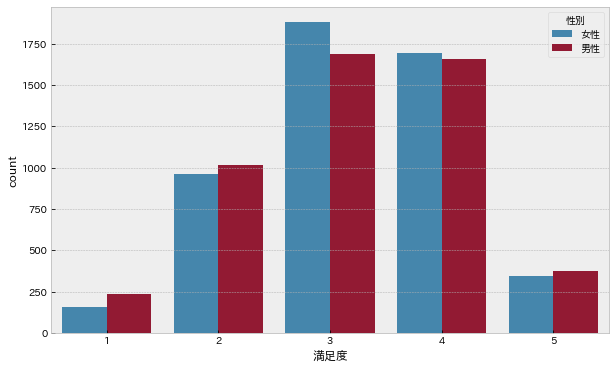

In [5]:
sns.countplot(x='満足度', hue='性別', data=df);

In [7]:
# 代表値の確認
group = df.groupby('性別')
group['満足度'].agg(['mean', 'median'])

,mean,median
性別,,
女性,3.219638,3.0
男性,3.183940,3.0


### 仮説立て
   - 性別によって満足度の差がある

### 仮説が正しいか検証

In [11]:
mens = group.get_group('男性')
womens = group.get_group('女性')

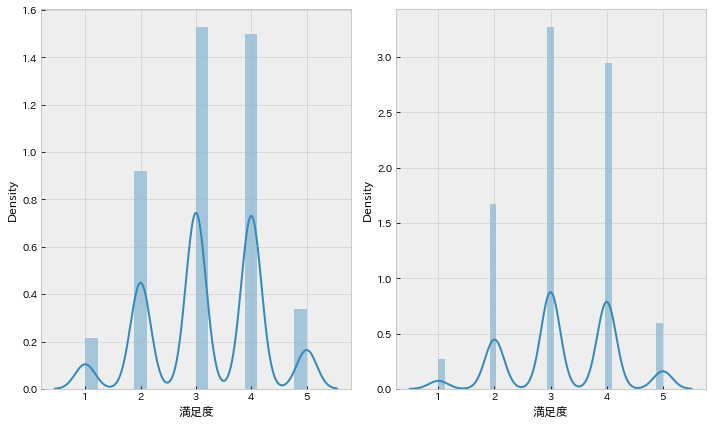

In [12]:
# 正規性の確認
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

In [16]:
# コルモゴロフ・スミルノフ検定
stats.kstest(mens['満足度'],"norm") # 正規分布ではない

KstestResult(statistic=0.9297554023645598, pvalue=0.0)

In [17]:
stats.kstest(womens['満足度'],"norm") # 正規分布ではない

KstestResult(statistic=0.9460433484732081, pvalue=0.0)

- 仮説を立てる
   - 帰無仮説: 2 群間の平均値に差がない
   - 対立仮説: 2 群間の平均値に差がある
- 有意水準
   - 5%
- p値

In [18]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=12311050.0, pvalue=0.1708277786931579)

Wifi 設備と満足度について確認

- 1.集計・可視化（探索的データ分析）
- 2.仮説立て
- 3.仮説が正しいか検証（確証的データ分析）

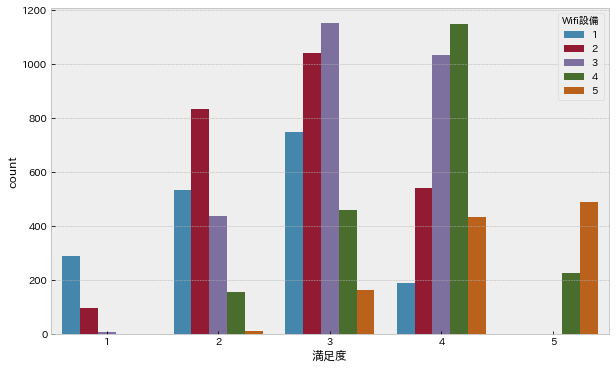

In [20]:
sns.countplot(x='満足度', hue='Wifi設備', data=df);

In [21]:
# WiFi設備の評価ごとの満足度の代表値
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


### 仮説立て
   - Wifi 設備と満足度は独立でなく何らかの関係性を持っている

### 仮説が正しいか検証
- χ二乗検定
   - 帰無仮説：2群間は独立
   - 対立仮説：2群間は独立ではない（何らかの関連性を持っている）

In [23]:
crosstab = pd.crosstab(df['満足度'], df['Wifi設備'])
crosstab

Wifi設備,1,2,3,4,5
満足度,,,,,
1,289,96,8,0,0
2,535,835,439,155,12
3,749,1043,1152,458,164
4,190,542,1036,1149,432
5,0,0,1,226,489


In [24]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:5356.10247526457
p 値:0.0
自由度:16


In [25]:
satis_0 = df.query('Wifi設備<=3')
satis_0.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


In [26]:
satis_1 = df.query('Wifi設備>=4')
satis_1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [27]:
print(f'Wifi設備3以下：{satis_0["満足度"].mean()}')
print(f'Wifi設備4以上：{satis_1["満足度"].mean()}')

Wifi設備3以下：2.880694143167028
Wifi設備4以上：3.9218800648298218


### 仮説立て
 - Wifi 設備の評価が 4 以上の人は満足度を高くつける傾向になる

### 仮説が正しいか検証

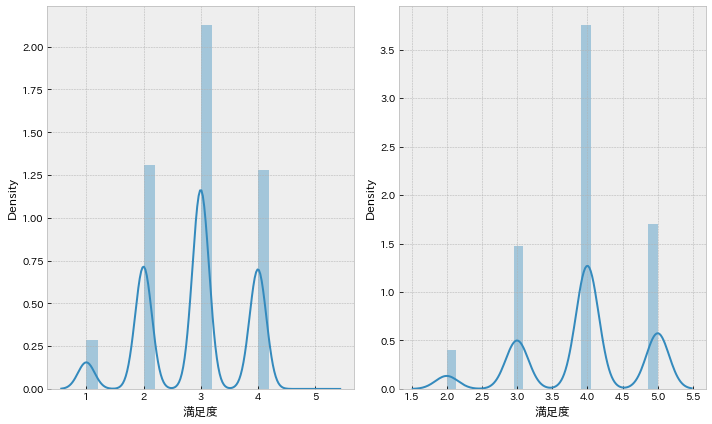

In [30]:
# 正規性の確認
plt.subplot(1, 2, 1)
sns.distplot(satis_0['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(satis_1['満足度'])
plt.tight_layout()

In [32]:
print(stats.kstest(satis_0['満足度'], "norm")) # 正規分布ではない
print(stats.kstest(satis_1['満足度'], "norm")) # 正規分布ではない

KstestResult(statistic=0.920416896251387, pvalue=0.0)
KstestResult(statistic=0.9772498680518208, pvalue=0.0)


- 仮説立て
   - 帰無仮説: 2 群間の平均値に差がない
   - 対立仮説: 2 群間の平均値に差がある
- 有意水準
   - 5%
- p値

In [33]:
stats.mannwhitneyu(satis_0['満足度'], satis_1['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=4353567.0, pvalue=0.0)